In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
temp = pd.read_csv('car_price.csv')

In [4]:

temp.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [5]:
data = temp[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'
            ]]

In [6]:
data['Current_Year'] = 2020


In [7]:

data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Current_Year
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2020
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2020
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2020
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2020
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,2020


In [8]:
data['# Years'] = data['Current_Year'] - data['year']

In [9]:
to_drop = ['Current_Year','year','torque','max_power','seller_type','owner']
data.drop(to_drop, inplace = True, axis = 1)

In [10]:

data.head()

,selling_price,km_driven,fuel,transmission,mileage,engine,seats,# Years
0,450000,145500,Diesel,Manual,23.4 kmpl,1248 CC,5.0,6
1,370000,120000,Diesel,Manual,21.14 kmpl,1498 CC,5.0,6
2,158000,140000,Petrol,Manual,17.7 kmpl,1497 CC,5.0,14
3,225000,127000,Diesel,Manual,23.0 kmpl,1396 CC,5.0,10
4,130000,120000,Petrol,Manual,16.1 kmpl,1298 CC,5.0,13


In [11]:
data['engine']= data['engine'].str.replace('[^\d.]', '',regex = True).astype(float)

In [12]:

data['mileage'] = data['mileage'].str.replace('[^\d.]', '',regex = True).astype(float)

In [13]:
data.head()

,selling_price,km_driven,fuel,transmission,mileage,engine,seats,# Years
0,450000,145500,Diesel,Manual,23.40,1248.0,5.0,6
1,370000,120000,Diesel,Manual,21.14,1498.0,5.0,6
2,158000,140000,Petrol,Manual,17.70,1497.0,5.0,14
3,225000,127000,Diesel,Manual,23.00,1396.0,5.0,10
4,130000,120000,Petrol,Manual,16.10,1298.0,5.0,13


In [14]:
data.replace(to_replace = ['Diesel','Petrol','LPG','CNG'],value=[1,2,3,4],inplace = True)

In [15]:
data.head()

,selling_price,km_driven,fuel,transmission,mileage,engine,seats,# Years
0,450000,145500,1,Manual,23.40,1248.0,5.0,6
1,370000,120000,1,Manual,21.14,1498.0,5.0,6
2,158000,140000,2,Manual,17.70,1497.0,5.0,14
3,225000,127000,1,Manual,23.00,1396.0,5.0,10
4,130000,120000,2,Manual,16.10,1298.0,5.0,13


In [16]:
data.replace(to_replace = ['Manual','Automatic'],value=[1.0,2.0],inplace = True)

In [17]:
data.head()

,selling_price,km_driven,fuel,transmission,mileage,engine,seats,# Years
0,450000,145500,1,1.0,23.40,1248.0,5.0,6
1,370000,120000,1,1.0,21.14,1498.0,5.0,6
2,158000,140000,2,1.0,17.70,1497.0,5.0,14
3,225000,127000,1,1.0,23.00,1396.0,5.0,10
4,130000,120000,2,1.0,16.10,1298.0,5.0,13


In [18]:
data.head()

,selling_price,km_driven,fuel,transmission,mileage,engine,seats,# Years
0,450000,145500,1,1.0,23.40,1248.0,5.0,6
1,370000,120000,1,1.0,21.14,1498.0,5.0,6
2,158000,140000,2,1.0,17.70,1497.0,5.0,14
3,225000,127000,1,1.0,23.00,1396.0,5.0,10
4,130000,120000,2,1.0,16.10,1298.0,5.0,13


[[ 1.          1.33828022 -0.86972865 ... -0.41797619 -0.43426926
  -0.04846121]
 [ 1.          0.88735626 -0.86972865 ...  0.07813794 -0.43426926
  -0.04846121]
 [ 1.          1.24102211  0.95315801 ...  0.07615349 -0.43426926
   1.92965648]
 ...
 [ 1.          0.88735626 -0.86972865 ... -0.41797619 -0.43426926
   1.18786235]
 [ 1.         -0.79255652 -0.86972865 ... -0.12427662 -0.43426926
   0.1988035 ]
 [ 1.         -0.79255652 -0.86972865 ... -0.12427662 -0.43426926
   0.1988035 ]]
[[nan nan nan nan nan nan nan nan]]
nan


Text(0.5, 1.0, 'Error vs. Training Epoch')

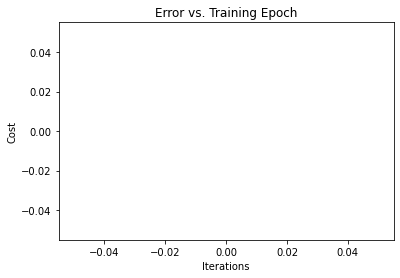

In [21]:
data = (data - data.mean())/data.std()



X = data.iloc[:,1:8]

ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = data.iloc[:,0:1].values 
theta = np.zeros([1,8])

print(X)





def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
        
    
    return theta,cost


alpha = 0.01
iters = 1000

g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)


 
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
